# import the required module

In [53]:
import pandas as pd ,numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# download the dataset from the kaggle and load to pandas data frame

In [54]:
wine = pd.read_csv('WineQT.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


# Data preparation and cleaning:

In [55]:
# let check the dimensions of the dataframe
wine.shape

(1143, 13)

In [56]:
# let check the missing values in the dataframe 
round(100*(wine.isnull().sum()/len(wine.index)),2)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Id                      0.0
dtype: float64

<Axes: xlabel='quality', ylabel='count'>

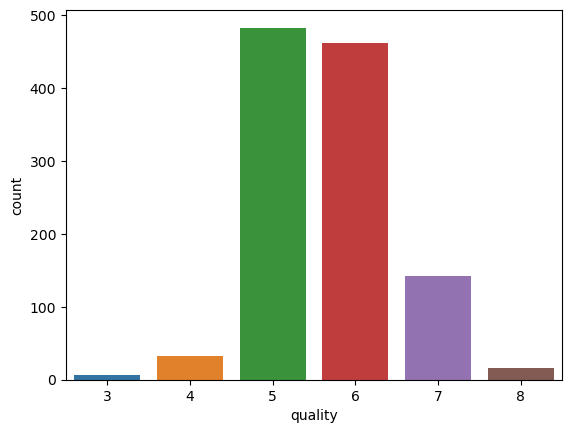

In [57]:
sns.countplot(x='quality',data=wine)

In [58]:
# classify quality into three groups:
def classify_quality(x):
    if x <=6:
        quality=0
    else:
        quality=1
    return quality   

In [59]:
wine['quality_category']=wine.quality.apply(classify_quality)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,quality_category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4,0


<Axes: xlabel='quality_category', ylabel='count'>

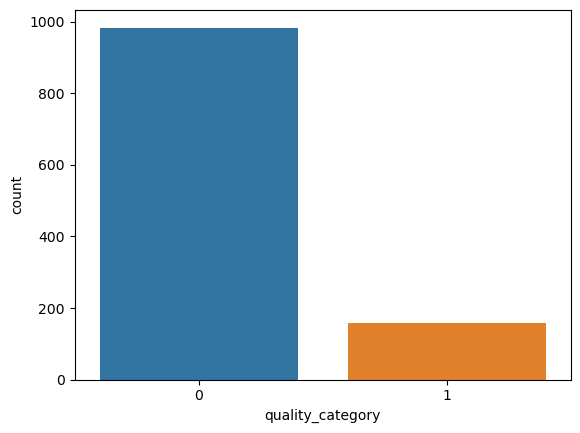

In [60]:
sns.countplot(x='quality_category',data=wine)

In [61]:
wine.drop('quality',axis=1,inplace=True)

In [62]:
# for the variable x and y 
x = wine.drop('quality_category',axis=1)
y = wine['quality_category']

In [63]:
# Rescaling and split the data set into test and train
x_std = StandardScaler().fit_transform(x)

In [64]:
# Splitting the data into train and test
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.30,random_state=100)
neighbors=  [x for x in list(range(1,100)) if x%2 == 0]
cv_scores = []

In [65]:
# perform 10-fold  cross validation on training set for odd values of k:
seed = 123

In [66]:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value,weights='uniform',p=2,metric='euclidean')
    kfold = model_selection.KFold(n_splits=10)
    scores = model_selection.cross_val_score(knn,x_train,y_train,cv=kfold,scoring='accuracy')
    cv_scores.append(scores.mean()*100)

In [67]:
optimal_k  = neighbors[cv_scores.index(max(cv_scores))]
print(optimal_k)

6


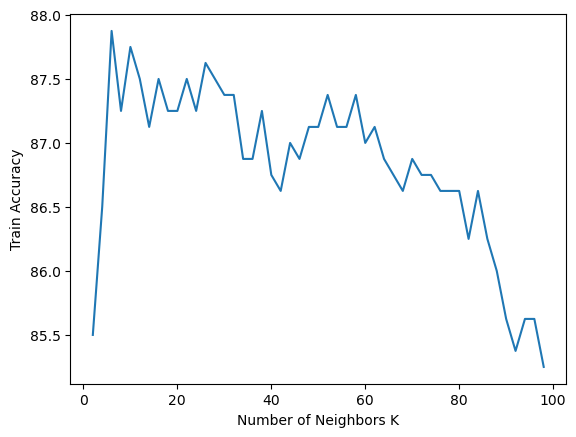

In [68]:
# to plot the graph
plt.plot(neighbors,cv_scores)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Train Accuracy")
plt.show()

# Model Building 

In [74]:
# use KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 58) 
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc_train = round(knn.score(x_train,y_train)*100,2)
acc_val = round(knn.score(x_test,y_test)*100,2)
print("Accuaracy of training dataset "+str(acc_train))
print("Accuaracy of testing dataset "+str(acc_val))

Accuaracy of training dataset 87.5
Accuaracy of testing dataset 87.76


In [70]:
#let's check accuracy of Randomforest classifier
rfc  = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
pred_rfc = rfc.predict(x_test)
acc_train = round(rfc.score(x_train,y_train)*100,2)
acc_val = round(rfc.score(x_test,y_test)*100,2)
print("Accuaracy of training dataset "+str(acc_train))
print("Accuaracy of testing dataset "+str(acc_val))

Accuaracy of training dataset 100.0
Accuaracy of testing dataset 89.8


In [71]:
# let's check accuracy  of SVC 
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
acc_train = round(svc.score(x_train,y_train)*100,2)
acc_val = round(svc.score(x_test,y_test)*100,2)
print("Accuarcy of training  dataset "+str(acc_train))
print("Accuarcy of testing dataset "+str(acc_val))

Accuarcy of training  dataset 90.25
Accuarcy of testing dataset 88.92


In [72]:
# We have to predict the wine quality of data set for the using by StandardScaler,LinearRegression,KNeighborsClassifier,RandomForestClassifier and SVC.